In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import zipfile
import os

# Path to your zip file
zip_path = '/content/drive/MyDrive/reddit (2).zip'  # Change this to your actual zip file path

# Directory where you want to extract the contents
extract_to = '/content/reddit (2)'  # Change this to your desired extraction path

# Make sure the extraction directory exists
os.makedirs(extract_to, exist_ok=True)

# Extract the zip file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_to)

print("Extraction complete.")


Extraction complete.


In [ ]:
# Importing Libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
sns.set(style="darkgrid")
%matplotlib inline

import re
import string
from nltk.corpus import stopwords
from wordcloud import WordCloud, STOPWORDS
from collections import Counter
import tensorflow as tf

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer # Import Tokenizer from tensorflow.keras.preprocessing.text
from tensorflow.keras.models import Sequential # Import Sequential from tensorflow.keras.models
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout # Import layers from tensorflow.keras.layers
from sklearn.metrics import f1_score, precision_score, recall_score
import pickle

import warnings
warnings.filterwarnings("ignore")

In [ ]:
# Utility Functions
def text_cleaning(text):
    """
    Clean the text using NLP and regular expressions

    text = Uncleaned text
    """
    text = re.sub(r'https?://\S+|www\.\S+', 'URL', text)
    text = re.sub(r'<.*?>', '', text)
    text = ''.join([char for char in text if char in string.printable])
    text = re.sub(r'@\S+', 'USER', text)
    table = str.maketrans('', '', string.punctuation)
    text = text.translate(table)
    text = ' '.join([word for word in text.split() if word not in stopwords.words("english")])
    return text


In [ ]:
# Fetching reddit data
data = pd.read_csv("/content/reddit (2)/Reddit_Data.csv")
# Renaming column
data.rename({'clean_comment':'clean_text'}, axis=1, inplace=True)
data.head()

,clean_text,category
0,family mormon have never tried explain them t...,1
1,buddhism has very much lot compatible with chr...,1
2,seriously don say thing first all they won get...,-1
3,what you have learned yours and only yours wha...,0
4,for your own benefit you may want read living ...,1


In [ ]:
# Checking datatypes/shape of data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37249 entries, 0 to 37248
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   clean_text  37149 non-null  object
 1   category    37249 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 582.1+ KB


In [ ]:
# Checking Statistical Summary of data
data.describe(include='all')

,clean_text,category
count,37149,37249.000000
unique,36799,NaN
top,,NaN
freq,115,NaN
mean,NaN,0.202771
std,NaN,0.778515
min,NaN,-1.000000
25%,NaN,0.000000
50%,NaN,0.000000
75%,NaN,1.000000


In [ ]:
# Checking null values
print(data.isnull().sum())
print()
# Removing null values
data.dropna(inplace=True)
print(data.isnull().sum())

clean_text    100
category        0
dtype: int64

clean_text    0
category      0
dtype: int64


In [ ]:
# Checking duplicated values
print(data.duplicated().sum())
print()
# Removing duplicated values
data.drop_duplicates(inplace=True)
data.duplicated().sum()

350



np.int64(0)

In [ ]:
import nltk

# Download the 'stopwords' resource
nltk.download('stopwords')

# Utility Functions
def text_cleaning(text):
    """
    Clean the text using NLP and regular expressions

    text = Uncleaned text
    """
    text = re.sub(r'https?://\S+|www\.\S+', 'URL', text)
    text = re.sub(r'<.*?>', '', text)
    text = ''.join([char for char in text if char in string.printable])
    text = re.sub(r'@\S+', 'USER', text)
    table = str.maketrans('', '', string.punctuation)
    text = text.translate(table)
    text = ' '.join([word for word in text.split() if word not in stopwords.words("english")])
    return text

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
# Renaming the category for meaningful insights
mapping = {0: 'Neutral', 1: 'Positive', -1: 'Negative'}
data['category'] = data['category'].map(mapping)
data.head()

,clean_text,category
0,family mormon have never tried explain them t...,Positive
1,buddhism has very much lot compatible with chr...,Positive
2,seriously don say thing first all they won get...,Negative
3,what you have learned yours and only yours wha...,Neutral
4,for your own benefit you may want read living ...,Positive


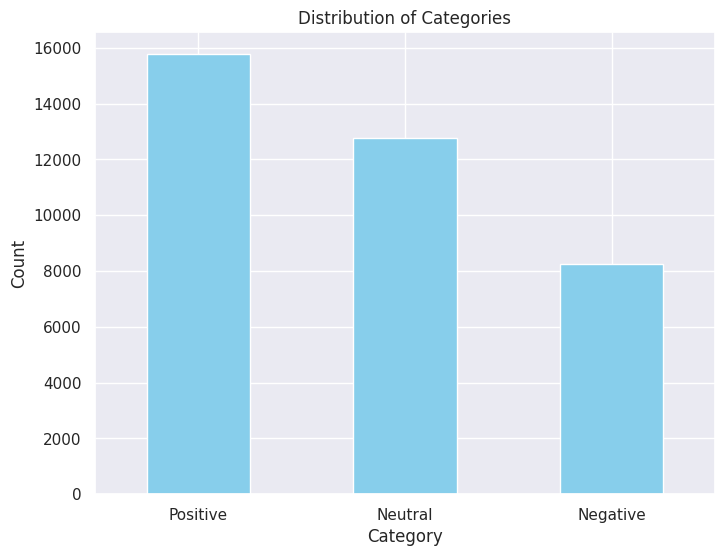

In [ ]:
# Checking the distribution of categories
category_counts = data['category'].value_counts()
plt.figure(figsize=(8, 6))
category_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Categories')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

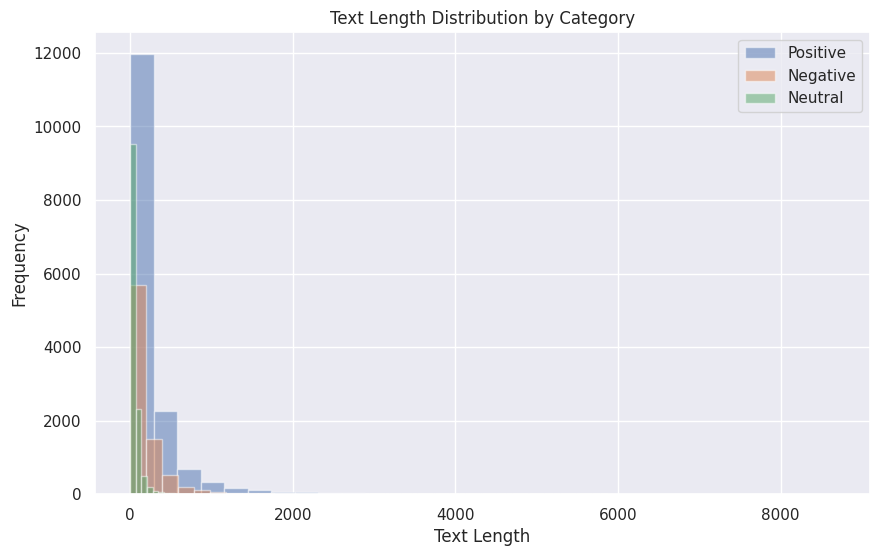

In [ ]:
# Performing Text Length Analysis
data['text_length'] = data['clean_text'].apply(len)
plt.figure(figsize=(10, 6))
for category in data['category'].unique():
    subset = data[data['category'] == category]
    plt.hist(subset['text_length'], bins=30, alpha=0.5, label=category)
plt.title('Text Length Distribution by Category')
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.legend()
plt.show()

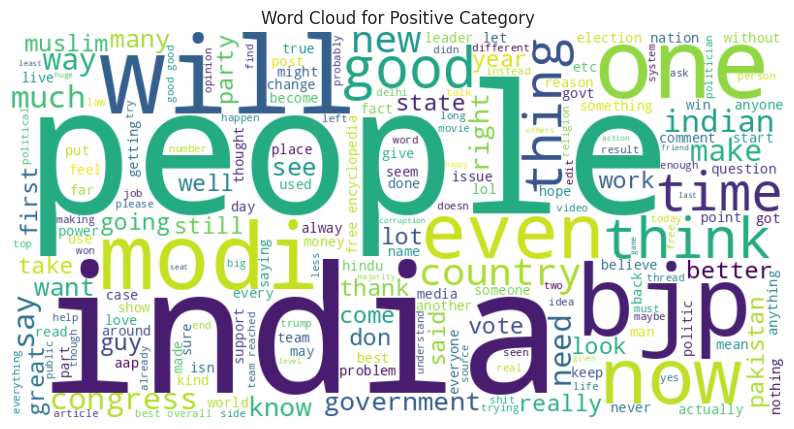

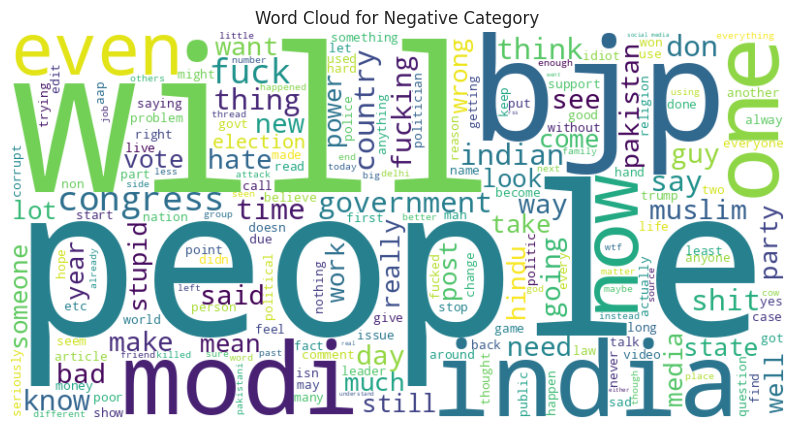

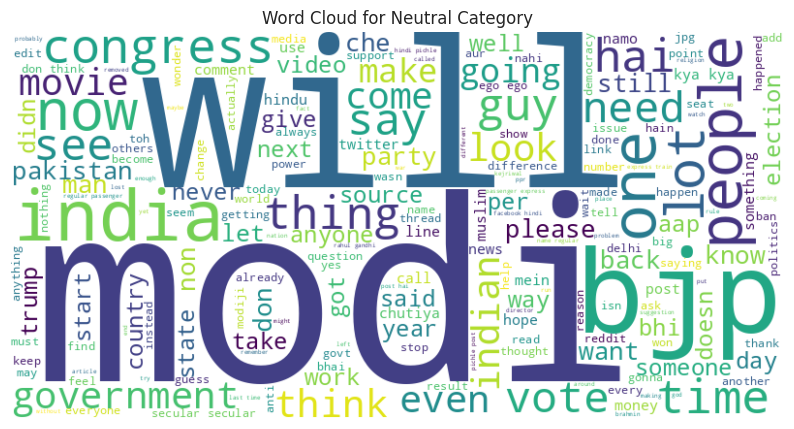

In [ ]:
# Creating wordcloud for each category
categories = data['category'].unique()
for category in categories:
    text = " ".join(data[data['category'] == category]['clean_text'])
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Word Cloud for {category} Category')
    plt.axis("off")
    plt.show()

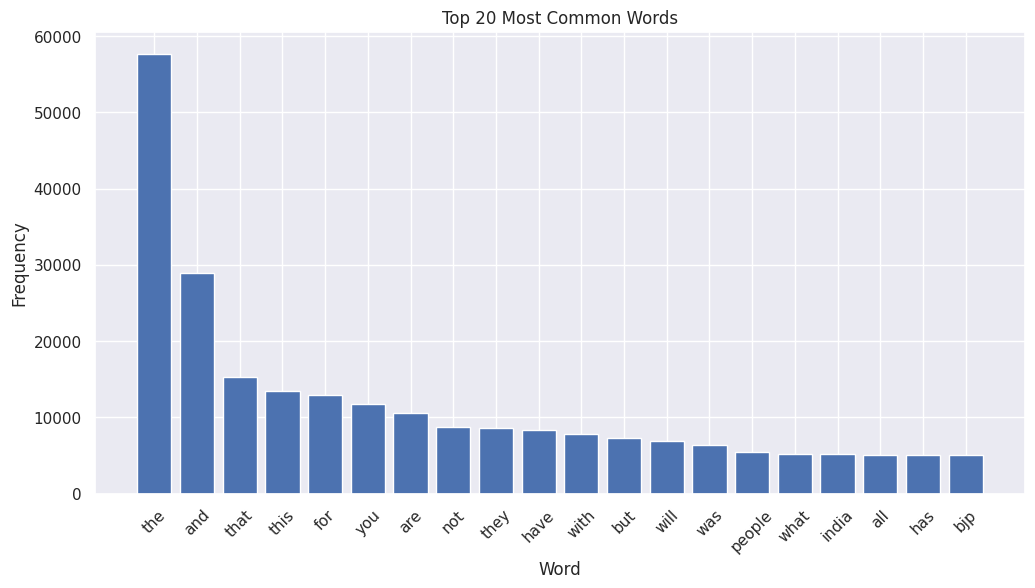

In [ ]:
# Calculating Word Frequency
all_text = " ".join(data['clean_text'])
words = all_text.split()
word_counts = Counter(words)
stopwords = set(STOPWORDS)
top_words = word_counts.most_common(20)
plt.figure(figsize=(12, 6))
plt.bar(*zip(*top_words))
plt.title('Top 20 Most Common Words')
plt.xlabel('Word')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data['clean_text'], data['category'], test_size=0.2, random_state=42)

In [ ]:
# Encoding the target labels
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.transform(y_test)
# Checking the mapping
class_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print("Class Mapping:")
for class_label, encoded_value in class_mapping.items():
    print(f"{class_label}: {encoded_value}")

Class Mapping:
Negative: 0
Neutral: 1
Positive: 2


In [ ]:

# Tokenizing and padding the text data
max_words = 10000
max_sequence_length = 100
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(X_train)
X_train_sequence = tokenizer.texts_to_sequences(X_train)
X_test_sequence = tokenizer.texts_to_sequences(X_test)
X_train_padded = tf.keras.preprocessing.sequence.pad_sequences(X_train_sequence, maxlen=max_sequence_length)
X_test_padded = tf.keras.preprocessing.sequence.pad_sequences(X_test_sequence, maxlen=max_sequence_length)
# Saving the tokenizer for future use
tokenizer_filename = 'tokenizer.pkl'
with open(tokenizer_filename, 'wb') as tokenizer_file:
    pickle.dump(tokenizer, tokenizer_file)

In [ ]:
# Hyperparameters
embedding_dim = 100
batch_size = 64
epochs = 10
# Building the LSTM model
model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length=max_sequence_length))
model.add(LSTM(100))
model.add(Dropout(0.5))
model.add(Dense(3, activation='softmax'))
# Compiling & training
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(X_train_padded, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)
# Evaluation on Test data
test_loss, test_accuracy = model.evaluate(X_test_padded, y_test, verbose=1)
print(f'Test Loss: {test_loss:.4f}')
print(f'Test Accuracy: {test_accuracy:.4f}')
# Predictions on Test data
y_test_pred = model.predict(X_test_padded)
y_test_pred_classes = np.argmax(y_test_pred, axis=1)
# Calculate additional metrics
f1 = f1_score(y_test, y_test_pred_classes, average='weighted')
precision = precision_score(y_test, y_test_pred_classes, average='weighted')
recall = recall_score(y_test, y_test_pred_classes, average='weighted')
print(f'F1 Score: {f1:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')

Epoch 1/10
414/414 ━━━━━━━━━━━━━━━━━━━━ 103s 242ms/step - accuracy: 0.6393 - loss: 0.8146 - val_accuracy: 0.8815 - val_loss: 0.3283
Epoch 2/10
414/414 ━━━━━━━━━━━━━━━━━━━━ 136s 228ms/step - accuracy: 0.9201 - loss: 0.2511 - val_accuracy: 0.9090 - val_loss: 0.2589
Epoch 3/10
414/414 ━━━━━━━━━━━━━━━━━━━━ 95s 231ms/step - accuracy: 0.9526 - loss: 0.1642 - val_accuracy: 0.9049 - val_loss: 0.2814
Epoch 4/10
414/414 ━━━━━━━━━━━━━━━━━━━━ 143s 234ms/step - accuracy: 0.9644 - loss: 0.1265 - val_accuracy: 0.9052 - val_loss: 0.2981
Epoch 5/10
414/414 ━━━━━━━━━━━━━━━━━━━━ 150s 252ms/step - accuracy: 0.9719 - loss: 0.1023 - val_accuracy: 0.9005 - val_loss: 0.3235
Epoch 6/10
414/414 ━━━━━━━━━━━━━━━━━━━━ 135s 235ms/step - accuracy: 0.9738 - loss: 0.0973 - val_accuracy: 0.8995 - val_loss: 0.3852
Epoch 7/10
414/414 ━━━━━━━━━━━━━━━━━━━━ 141s 233ms/step - accuracy: 0.9812 - loss: 0.0704 - val_accuracy: 0.9039 - val_loss: 0.3790
Epoch 8/10
414/414 ━━━━━━━━━━━━━━━━━━━━ 140s 229ms/step - accuracy: 0.9838 - 

In [ ]:
# Saving the model to a file
model.save('LSTM.h5')

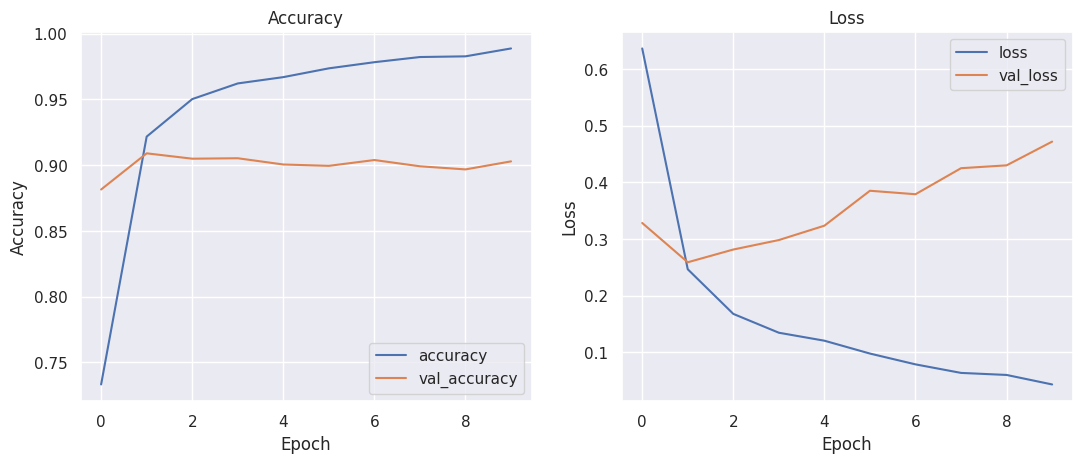

In [ ]:
# Plotting training and testing curves
default_size = plt.rcParams['figure.figsize']
fig = plt.figure(figsize=[default_size[0] * 2, default_size[1]])

fig.add_subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label = 'accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy')
plt.legend(loc='lower right')

fig.add_subplot(1, 2, 2)
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss')
plt.legend(loc='upper right')
plt.show()

In [ ]:
user_input = "You are very good!!, keep it up"
user_sequences = tokenizer.texts_to_sequences([user_input])
user_padded = tf.keras.preprocessing.sequence.pad_sequences(user_sequences, maxlen=max_sequence_length)

from keras.models import load_model
loaded_model = load_model('LSTM.h5')
class_mapping={
0:'Negative',
1:'Neutral',
2:'Positive'}
# Make predictions on user input
user_predictions = loaded_model.predict(user_padded)
# Convert predictions to class labels (assuming it's a classification task)
user_pred_classes = np.argmax(user_predictions, axis=1)
# Print the predicted class
print(f'Predicted Class: {class_mapping[user_pred_classes[0]]}')


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 898ms/step
Predicted Class: Positive
